In [ ]:
#pip install deepface
#pip install --upgrade tensorflow --user
#pip install --upgrade tensorflow-gpu --user

In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img1_path = 'Swapnil1.jpg'
img2_path = 'tests/datasets/img3.jpg'

In [3]:
img1 = DeepFace.detectFace(img1_path)
img2 = DeepFace.detectFace(img2_path)

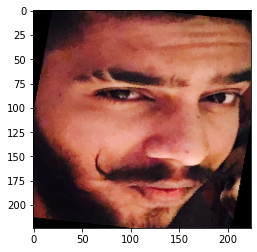

In [4]:
plt.imshow(img1)

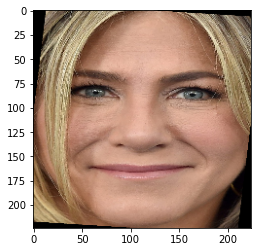

In [5]:
plt.imshow(img2)

In [6]:
model_name = 'ArcFace'

In [7]:
resp = DeepFace.verify(img1_path = img1_path,img2_path = img2_path, model_name = model_name)

arcface_weights.h5  will be downloaded to  C:\Users\User/.deepface/weights/arcface_weights.h5


Downloading...
From: https://drive.google.com/uc?id=1LVB3CdVejpmGHM28BpqqkbZP5hDEcdZY
To: C:\Users\User\.deepface\weights\arcface_weights.h5
137MB [00:38, 3.55MB/s] 


In [8]:
resp

{'verified': False,
 'distance': 0.8943426209991642,
 'max_threshold_to_verify': 0.6871912959056619,
 'model': 'ArcFace',
 'similarity_metric': 'cosine'}

In [9]:
df = DeepFace.find(img_path = 'source.jpg',db_path = 'tests/datasets' )

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: C:\Users\User\.deepface\weights\vgg_face_weights.h5
580MB [02:38, 3.66MB/s] 


There are  60  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [01:19<00:00, 79.29s/it]

find function lasts  373.88948798179626  seconds


In [10]:
df.head()

,identity,VGG-Face_cosine
0,tests/datasets/img1.jpg,0.260120
1,tests/datasets/img4.jpg,0.286842
2,tests/datasets/img7.jpg,0.316961
3,tests/datasets/img6.jpg,0.378450
4,tests/datasets/img2.jpg,0.379695


In [11]:
obj = DeepFace.analyze(img_path = img1_path)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: C:\Users\User\.deepface\weights\facial_expression_model_weights.zip
5.54MB [00:01, 3.83MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: C:\Users\User\.deepface\weights\age_model_weights.h5
539MB [02:09, 4.17MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: C:\Users\User\.deepface\weights\gender_model_weights.h5
537MB [02:15, 3.97MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: C:\Users\User\.deepface\weights\race_model_single_batch.zip
511MB [01:38, 5.18MB/s] 
Action: race: 100%|██████████| 4/4 [06:09<00:00, 92.38s/it]    


In [12]:
obj

{'region': {'x': 252, 'y': 363, 'w': 435, 'h': 574},
 'emotion': {'angry': 0.01272695662919432,
  'disgust': 8.805862939872955e-11,
  'fear': 99.90255832672119,
  'happy': 0.0824985618237406,
  'sad': 0.001923582203744445,
  'surprise': 2.5454013896641925e-08,
  'neutral': 0.0002973606797240791},
 'dominant_emotion': 'fear',
 'age': 30,
 'gender': 'Man',
 'race': {'asian': 2.5743393227458,
  'indian': 38.71966600418091,
  'black': 12.455294281244278,
  'white': 12.839218974113464,
  'middle eastern': 16.107194125652313,
  'latino hispanic': 17.3042893409729},
 'dominant_race': 'indian'}

In [14]:
import pickle

In [21]:
pickle_out = open('gender_flask.pkl','wb')
pickle.dump(DeepFace.analyze, pickle_out)
loaded_model = pickle.load(open('gender_flask.pkl','rb'))


In [23]:
loaded_model('Swapnil.jpg')

Action: race: 100%|██████████| 4/4 [00:31<00:00,  7.91s/it]   


{'region': {'x': 252, 'y': 363, 'w': 435, 'h': 574},
 'emotion': {'angry': 0.01272695662919432,
  'disgust': 8.805862939872955e-11,
  'fear': 99.90255832672119,
  'happy': 0.0824985618237406,
  'sad': 0.001923582203744445,
  'surprise': 2.5454013896641925e-08,
  'neutral': 0.0002973606797240791},
 'dominant_emotion': 'fear',
 'age': 30,
 'gender': 'Man',
 'race': {'asian': 2.5743393227458,
  'indian': 38.71966600418091,
  'black': 12.455294281244278,
  'white': 12.839218974113464,
  'middle eastern': 16.107194125652313,
  'latino hispanic': 17.3042893409729},
 'dominant_race': 'indian'}

In [24]:
loaded_model('Source.jpg')

Action: race: 100%|██████████| 4/4 [00:30<00:00,  7.58s/it]   


{'region': {'x': 479, 'y': 21, 'w': 421, 'h': 558},
 'emotion': {'angry': 1.94076976711699e-07,
  'disgust': 1.2233725317500888e-10,
  'fear': 0.007022085628705099,
  'happy': 99.99078512191772,
  'sad': 9.988172955388563e-07,
  'surprise': 3.3515092923153134e-06,
  'neutral': 0.0021909574570599943},
 'dominant_emotion': 'happy',
 'age': 31,
 'gender': 'Woman',
 'race': {'asian': 5.65682128071785,
  'indian': 1.8004247918725014,
  'black': 0.8698548190295696,
  'white': 63.04516792297363,
  'middle eastern': 9.765347838401794,
  'latino hispanic': 18.86238157749176},
 'dominant_race': 'white'}

In [25]:
loaded_model('swapnil1.jpg')

Action: race: 100%|██████████| 4/4 [03:30<00:00, 52.66s/it]   


{'region': {'x': 56, 'y': 110, 'w': 70, 'h': 89},
 'emotion': {'angry': 0.0017177419067593291,
  'disgust': 5.876733778640547e-15,
  'fear': 5.088345300663377e-07,
  'happy': 99.99717473983765,
  'sad': 4.260961805613306e-07,
  'surprise': 1.630582779910128e-06,
  'neutral': 0.0011064291356888134},
 'dominant_emotion': 'happy',
 'age': 32,
 'gender': 'Man',
 'race': {'asian': 12.764742938906796,
  'indian': 25.293084944118863,
  'black': 18.49770176438072,
  'white': 8.30724512848316,
  'middle eastern': 10.17385227395865,
  'latino hispanic': 24.963369969919924},
 'dominant_race': 'indian'}